In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [169]:
prosper_data = pd.read_csv("./prosperLoanData_clean.csv")

In [170]:
pd.set_option('display.max_columns', None)

In [171]:
prosper_data.head()

,Term,BorrowerRate,ListingCategory_numeric,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,AverageCreditScore
0,36,0.2958,1,31,35,0,50.0,False,26.0,25.0,47.0,25,920.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,25139.0,0.63,8018.0,38.0,1.0,0.29,True,4750.000000,14,4000,7,168.89,1.0,0,0,0.0,33,689.5
1,36,0.3149,3,4,41,0,87.0,False,11.0,10.0,16.0,7,62.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,2130.0,0.13,13570.0,16.0,2.0,0.17,True,7083.333333,824,7500,16,324.54,1.0,0,0,0.0,19,689.5
2,36,0.1203,1,14,62,0,75.0,True,10.0,10.0,28.0,8,573.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30925.0,0.73,10973.0,26.0,0.0,0.34,True,5269.416667,0,15000,8,498.43,1.0,0,0,0.0,167,729.5
3,60,0.2573,3,18,65,0,16.0,False,2.0,2.0,8.0,2,25.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,109.0,0.15,591.0,4.0,1.0,0.12,True,2916.666667,233,11000,12,327.59,1.0,0,0,0.0,118,749.5
4,60,0.2624,13,31,35,2,243.0,True,3.0,2.0,14.0,1,216.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,10789.0,0.98,111.0,14.0,0.0,0.16,True,2447.250000,319,6000,17,180.50,1.0,0,0,0.0,53,689.5


In [172]:
y = prosper_data.BorrowerRate

In [173]:
X = prosper_data.drop(columns = ['BorrowerRate'])

In [174]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=3)

In [175]:
model = Sequential()
model.add(Dense(12, input_dim = Xtrain.shape[1], activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [176]:
model.fit(Xtrain,ytrain,epochs=10, batch_size=10)

Epoch 1/10
3500/3500 [==============================] - 1s 374us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 2/10
3500/3500 [==============================] - 0s 108us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 3/10
3500/3500 [==============================] - 0s 113us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 4/10
3500/3500 [==============================] - 0s 109us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 5/10
3500/3500 [==============================] - 0s 109us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 6/10
3500/3500 [==============================] - 0s 113us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 7/10
3500/3500 [==============================] - 0s 111us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 8/10
3500/3500 [==============================] - 0s 106us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 9/10
3500/3500 [==============================] - 0s 111us/step - loss: 12.8751 - acc: 0.0000e+00
Epoch 10/10
3500/3500 [==============================] - 0s 110u

In [177]:
ypred = model.predict(Xtest)

In [178]:
ypred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

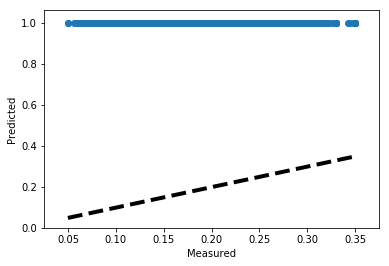

In [179]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred)
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()